[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ETDlZiZJoqyXMlNmNQ8MpHNNcy-Zp5Dr#scrollTo=KSXZXY7SOJeW)


In [1]:
# Installing packages

!pip install wordninja==2.0.0 numpy==1.22.4 contractions==0.1.73 nltk==3.8.1 tensorflow==2.12.0 tensorflow-text==2.12.1 tensorflow-hub==0.13.0 matplotlib==3.7.1 seaborn==0.12.2 scikit-learn==1.2.2 plotly==5.13.1 PyMuPDF==1.22.1 bert-for-tf2==0.14.9 requests==2.27.1 pandas==1.5.3 wordcloud==1.8.2.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.6/541.6 kB 23.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 9.7 MB/s eta 0:00:00
  Created wheel for wordninja: filename=wordninja-2.0.0-py3-none-any.whl size=541531 sha256=021931148dc4c323faa7ad43ae4a7a579a6594918b5696a81ae4986f2170f48c
  Stored in directory: /root/.cache/pip/wheels/aa/44/3a/f2a5c1859b8b541ded969b4cd12d0a58897f12408f4f51e084
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=3051

In [2]:
# Importing librabries

import requests
import os
import fitz
import glob
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.corpus import words
import wordninja
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
from plotly.offline import iplot
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from sklearn.metrics import (confusion_matrix, accuracy_score, roc_auc_score,
                             precision_score, recall_score, f1_score,
                             cohen_kappa_score, matthews_corrcoef, classification_report)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

In [3]:
# List of download links and corresponding file names
download_links = [
    {'url': 'https://drive.google.com/uc?export=download&id=1-_WoifNaLCaxcEwyTl865589E3m4qAxS', 'filename': 'Biology1.pdf'},
    {'url': 'https://drive.google.com/uc?export=download&id=1wmfh8CkrMWjyOvNkXrsymmw3PmFomOUB', 'filename': 'Biology2.pdf'},
    {'url': 'https://drive.google.com/uc?export=download&id=16u0trx49fQvYGYmz6N7egNAaWE6zxFAQ', 'filename': 'Computer_Science1.pdf'},
    {'url': 'https://drive.google.com/uc?export=download&id=1S6DkHjHUzNzmVHdp4bgz7Lpxb16ZXEy2', 'filename': 'Computer_Science2.pdf'},
    {'url': 'https://drive.google.com/uc?export=download&id=1Va109nfuG2U68qeH2FlNJ3uZOXAqjnpO', 'filename': 'Computer_Science3.pdf'},
    {'url': 'https://drive.google.com/uc?export=download&id=19CKD4K1uyngyafUI8_uFaiD0w71F4COx', 'filename': 'Computer_Science4.pdf'},
    {'url': 'https://drive.google.com/uc?export=download&id=1zarC3y6BdQqY3j7mjRPBletmkVg6yBHh', 'filename': 'Computer_Science5.pdf'},
    {'url': 'https://drive.google.com/uc?export=download&id=1dsunh17Z72hxjffVhum36AhnKCIjt4ys', 'filename': 'History1.pdf'},
    {'url': 'https://drive.google.com/uc?export=download&id=1t92NXqBp4htdCdO14DKzrnzdAklIxFPp', 'filename': 'History2.pdf'},
    {'url': 'https://drive.google.com/uc?export=download&id=1K-CIzcw4rhapwA7v4MbJtX755PwJva_b', 'filename': 'History3.pdf'},
    {'url': 'https://drive.google.com/uc?export=download&id=1XUCBVhbCAYasVLjtZGVM0OQGuHNUlDTJ', 'filename': 'History4.pdf'},
    {'url': 'https://drive.google.com/uc?export=download&id=1q7iAHeIhAxNXA3O__SwZJ8IruzOSoOyf', 'filename': 'History5.pdf'},
    {'url': 'https://drive.google.com/uc?export=download&id=1EeITsFsc5g40mBg3EwT9F8DeG5KKnEML', 'filename': 'History6.pdf'},
    {'url': 'https://drive.google.com/uc?export=download&id=1mU25GRO0SrTFPy44PPquXmMEOrPRGbic', 'filename': 'Physics1.pdf'},
    {'url': 'https://drive.google.com/uc?export=download&id=1nqtPR81L9BExsu4lBTS7J_sHiErAyygb', 'filename': 'Physics2.pdf'}
]

# Loop through the download links and download each file
for item in download_links:
    url = item['url']
    filename = item['filename']

    try:
        with requests.get(url, stream=True) as r:
            r.raise_for_status()
            with open(filename, 'wb') as f:
                for chunk in r.iter_content(chunk_size=8192):
                    f.write(chunk)

        print(f"Downloaded {filename}")

    except requests.exceptions.RequestException as e:
        print(f"Error downloading {filename}: {e}")


Downloaded Biology1.pdf
Downloaded Biology2.pdf
Downloaded Computer_Science1.pdf
Downloaded Computer_Science2.pdf
Downloaded Computer_Science3.pdf
Downloaded Computer_Science4.pdf
Downloaded Computer_Science5.pdf
Downloaded History1.pdf
Downloaded History2.pdf
Downloaded History3.pdf
Downloaded History4.pdf
Downloaded History5.pdf
Downloaded History6.pdf
Downloaded Physics1.pdf
Downloaded Physics2.pdf


In [4]:
# Extracting the text from the pdf file

def split_text(text):
    words = text.split()
    half = len(words) // 2
    return ' '.join(words[:half]), ' '.join(words[half:])

def is_empty_file(file_path):
    return os.path.getsize(file_path) == 0

def remove_empty_file(file_path):
    if is_empty_file(file_path):
        os.remove(file_path)

def extract_text(pdf_file, subject_dir):
    os.makedirs(subject_dir, exist_ok=True)
    merged_text = ""

    try:
        with fitz.open(pdf_file) as pdf:
            for i, page in enumerate(pdf):
                text = page.get_text()
                words = text.split()
                if len(words) < 100:
                    merged_text += " " + text
                    continue

                if merged_text:
                    half1, half2 = split_text(merged_text)
                    file1_path = os.path.join(subject_dir, f'{os.path.splitext(os.path.basename(pdf_file))[0]}_merged_part1.txt')
                    with open(file1_path, 'w') as f1:
                        f1.write(half1)
                    remove_empty_file(file1_path)

                    file2_path = os.path.join(subject_dir, f'{os.path.splitext(os.path.basename(pdf_file))[0]}_merged_part2.txt')
                    with open(file2_path, 'w') as f2:
                        f2.write(half2)
                    remove_empty_file(file2_path)
                    merged_text = ""

                half1, half2 = split_text(text)

                file1_path = os.path.join(subject_dir, f'{os.path.splitext(os.path.basename(pdf_file))[0]}_page_{i+1}_part1.txt')
                with open(file1_path, 'w') as f1:
                    f1.write(half1)
                remove_empty_file(file1_path)

                file2_path = os.path.join(subject_dir, f'{os.path.splitext(os.path.basename(pdf_file))[0]}_page_{i+1}_part2.txt')
                with open(file2_path, 'w') as f2:
                    f2.write(half2)
                remove_empty_file(file2_path)
    except Exception as e:
        print(f"Error processing {pdf_file}: {e}")

if __name__ == '__main__':
    base_dir = "Dataset"
    subject_files = {
        'Computer_Science': [
            './Computer_Science1.pdf',
            './Computer_Science2.pdf',
            './Computer_Science3.pdf',
            './Computer_Science4.pdf',
            './Computer_Science5.pdf',
        ],
        'Physics': [
            './Physics1.pdf',
            './Physics2.pdf'
        ],
        'Biology': [
            './Biology1.pdf',
            './Biology2.pdf'
        ],
        'History': [
            './History1.pdf',
            './History2.pdf',
            './History3.pdf',
            './History4.pdf',
            './History5.pdf',
            './History6.pdf'
        ]
    }

    for subject, pdf_files in subject_files.items():
        print(f"Extracting text for {subject}")
        subject_dir = os.path.join(base_dir, subject)
        for pdf_file in pdf_files:
            extract_text(pdf_file, subject_dir)

Extracting text for Computer_Science
Extracting text for Physics
Extracting text for Biology
Extracting text for History


In [5]:
# Reads the extracted text data from multiple text files located in subfolders of a specified directory and appends the text data to data list and corresponding categories to category list.

data = []
category = []

# Set the path to the folder containing subfolders
path = os.path.expanduser("./Dataset")

# Loop over the subfolders and their contents
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):
        for file_path in glob.glob(os.path.join(folder_path, "*.txt")):
            # Read the text data from the file
            with open(file_path, "r", encoding="utf-8") as f:
                text = f.read()
            # Append the text and category to the data and labels lists
            data.append(text)
            category.append(folder)



In [6]:
# Get the number of datapoints in the dataset
num_datapoints = len(data)

# Print the number of datapoints
print('Number of datapoints:', num_datapoints)

Number of datapoints: 13110


In [7]:
# Print first hundred data list

data[:100]

['rapidly growing population, have put much stress on the country’s economy. Bangladesh is one of the poor- est nations in the world. The per capita income there is about $360 per year. Civil Strife Grips Sri Lanka Another newly freed and deeply troubled country on the Indian subconti- nent is Sri Lanka, a small, teardrop-shaped island nation just off the southeast coast of India. Formerly known as Ceylon, Sri Lanka gained its independ- ence from Britain in February of 1948. Two main ethnic groups dominate the nation. Three-quarters of the population are Sinhalese, who are Buddhists. A fifth are Tamils, a Hindu people of southern India and northern Sri Lanka. Sri Lanka’s recent history has also been one of turmoil. A militant group of Tamils has long fought an armed struggle for a separate Tamil nation. Since 1981, thousands of lives have been lost. In an effort to end the violence, Rajiv Gandhi and the Sri Lankan president tried to reach an accord in 1987. The agreement called for Ind

In [8]:
# Print first two categories

category[:2]

['History', 'History']

In [9]:
# download punkt and stopwords dataset from nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
# download words dataset from nltk
nltk.download('words')

# Load the set of English words
english_words = set(words.words())

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [11]:
# Define a function to preprocess the data

def preprocess_text(text):

    # Remove newlines
    text = re.sub(r'\n+', ' ', text)

    # Remove hyphens and put spaces
    text = re.sub(r'-', ' ', text)

    # Remove words containing numbers
    text = re.sub(r'\b\w*\d\w*\b', ' ', text)

    # Replace one or two letter words with an empty string
    text = re.sub(r'\b\w{1,2}\b', '', text)

    # Remove Roman numerals
    text = re.sub(r'\b[IVXLCDM]+\b', ' ', text, flags=re.IGNORECASE)

    # Convert to lowercase
    text = text.lower()

    # Separate joined words
    text = ' '.join(wordninja.split(text))

    # Remove URLs
    text = re.sub(r'http\S+', ' ', text)

    # Remove any special characters
    text = re.sub(r'[^\w\s]', ' ', text)

    # Remove numbers
    text = re.sub(r'\d+', ' ', text)

    # Replace duplicate word with single word
    text = re.sub(r'\b(\w+)\s+\1\b', r'\1', text, flags=re.IGNORECASE)

    # Remove punctuation
    text = re.sub(r'[^\w\s]|_', ' ', text)

    # Remove specific words
    text = re.sub(r'\b(?:one|two|use|also|would|first|fig|may|used|see|new|differennt|called|many|find|part|number|using|work|chapter|example|must|true|cos|false|within|result|much|another|figure|form|three|like|however|given)\b', " ", text, flags=re.IGNORECASE)
    text = re.sub(r'\b(?:oh|ost|coo|coa|syn|yl|lih|gre|sni|tait|al|ce|ten|elo|oid|ley|rer|se|isra|blu|lk|lu|ree|lt|lus|lu|el|line|thus|end|process|change|different|could)\b', '', text, flags=re.IGNORECASE)

    # Remove single alphabets excluding "a"
    text = re.sub(r"(?<![a-zA-Z])[^aA\s][^a-zA-Z]?(?![a-zA-Z])", "", text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text


In [12]:
# Apply the function

preprocessed_data = [preprocess_text(text) for text in data]

In [13]:
# View the data before preprocessing

data[12100:12200]

['7. Arrays, Collections & Dynamic Memory However, when the function foo() ends execution and returns control back to the main() function, (sometimes called unwinding), the contents of foo() ’s stack frame are altered as part of the process. Some of the contents are the same, but elements have been completely altered. Printing the “returned” contents of the array gives us garbage: a[0] = 1564158624 a[1] = 32767 a[2] = 15 a[3] = 20 a[4] = -626679356 This is not an issue when returning primitive types as the return value is placed in a special memory location available to the calling function. Even in our example, the return value is properly communicated to the calling function: its just that the returned value is a pointer to the array’s location (which happens to be a memory address in the “stale” stack frame). The stack frames are depicted in Figure 7.3. 7.2.1. Dynamic Memory The solution to the problems presented by static arrays is to use dynamically allocated arrays. Such arrays a

In [14]:
# View the data after preprocessing

preprocessed_data[12100:12200]

['arrays collections dynamic memory when the function foo ends execution and returns control back the main function sometimes unwinding the contents foo stack frame are altered the some the contents are the same but elements have been completely altered printing the returned contents the array gives garbage this not issue when returning primitive types the return value placed special memory location available the calling function even our the return value properly communicated the calling function its just that the returned value pointer the array location which happens memory address the stale stack frame the stack frames are depicted dynamic memory the solution the problems presented static arrays dynamically allocated arrays such arrays are not allocated and stored the program call stack but instead are stored area the heap fact because the shortcomings static arrays some languages only allow you dynamically allocated arrays even done',
 'write python function named zero check that 

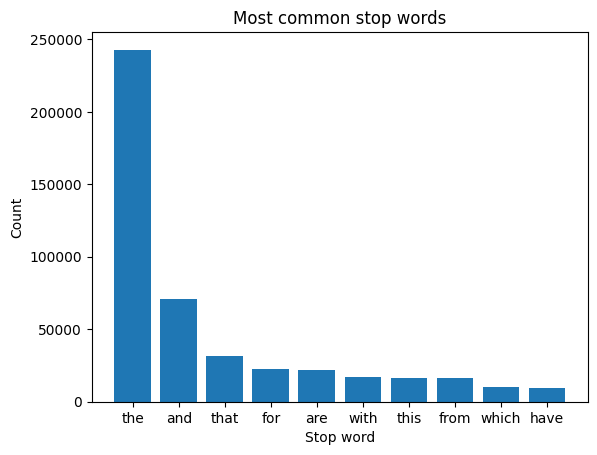

In [15]:
# Get the list of stop words
stop_words = set(nltk.corpus.stopwords.words('english'))

# Count the occurrences of each stop word in the datasets
stop_word_counts = Counter([word for dataset in preprocessed_data for word in dataset.split() if word in stop_words])

# Get the 10 most common stop words
most_common_stop_words = stop_word_counts.most_common(10)

# Plot the graph
plt.bar([word[0] for word in most_common_stop_words], [word[1] for word in most_common_stop_words])
plt.title('Most common stop words')
plt.xlabel('Stop word')
plt.ylabel('Count')
plt.show()


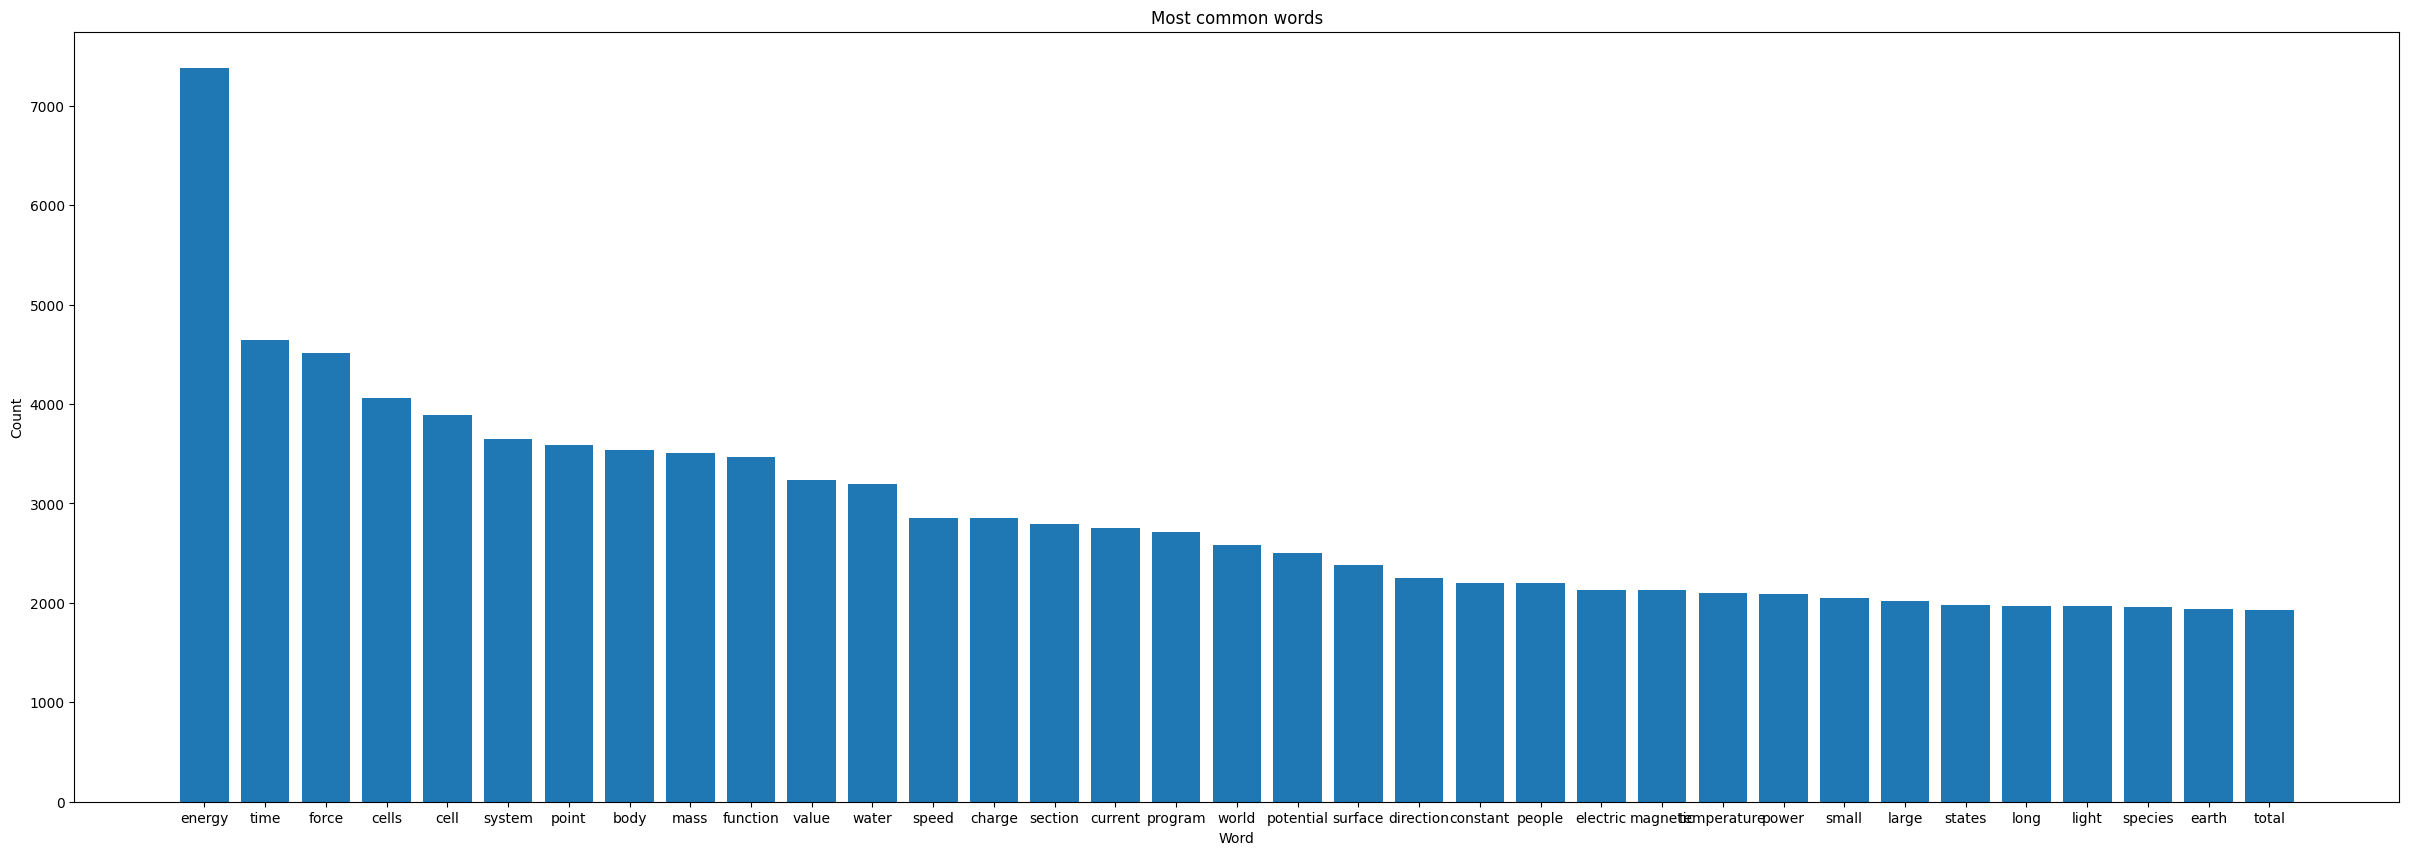

In [16]:
# Count the occurrences of each stop word in the datasets
word_counts = Counter([word for text in preprocessed_data for word in text.split() if word not in stop_words])

# Get the 35 most common words
most_common_words = word_counts.most_common(35)

# Set the figure size
plt.figure(figsize=(30, 10))

# Plot the graph
plt.bar([word[0] for word in most_common_words], [word[1] for word in most_common_words])
plt.title('Most common words')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [17]:
# Create a DataFrame with the preprocessed data and corresponding category
df = pd.DataFrame({'preprocessed_data': preprocessed_data, 'Category': category})

# Filter your data based on each label
data_biology = df[df['Category'] == 'Biology']['preprocessed_data']
data_computer_science = df[df['Category'] == 'Computer_Science']['preprocessed_data']
data_history = df[df['Category'] == 'History']['preprocessed_data']
data_physics = df[df['Category'] == 'Physics']['preprocessed_data']

In [18]:
# Define a function to create wordcloud
def create_word_cloud(data, label):
    # Join the different processed texts together
    long_string = ','.join(data)

    # Create a WordCloud object
    wordcloud = WordCloud(background_color="black", max_words=1000, contour_width=3, contour_color='steelblue')

    # Generate a word cloud
    wordcloud.generate(long_string)

    # Visualize the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {label}")
    plt.show()


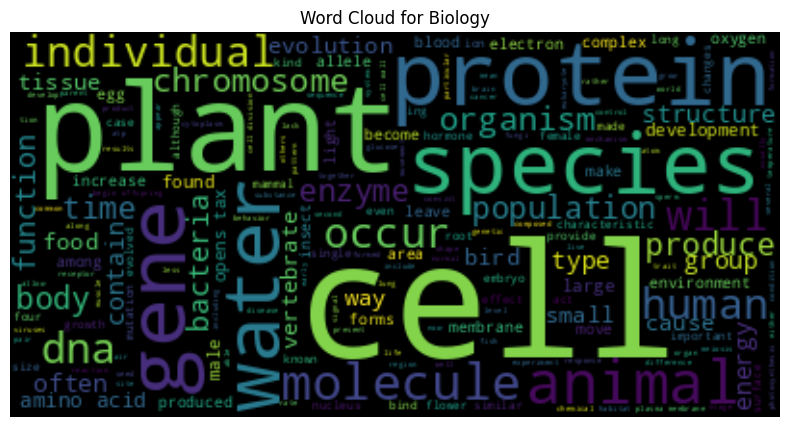

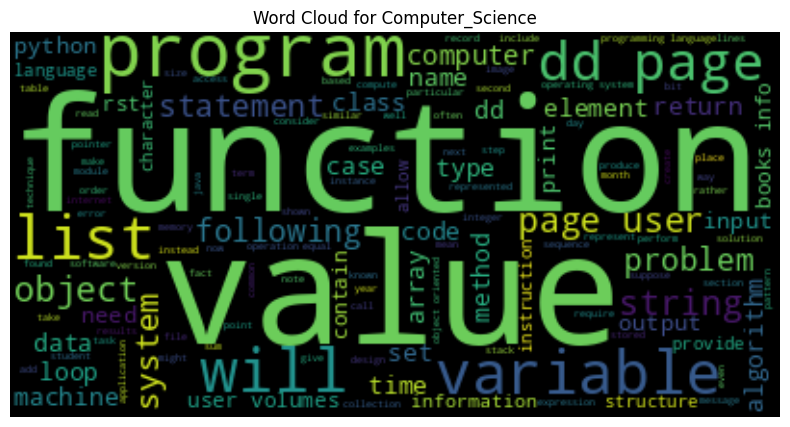

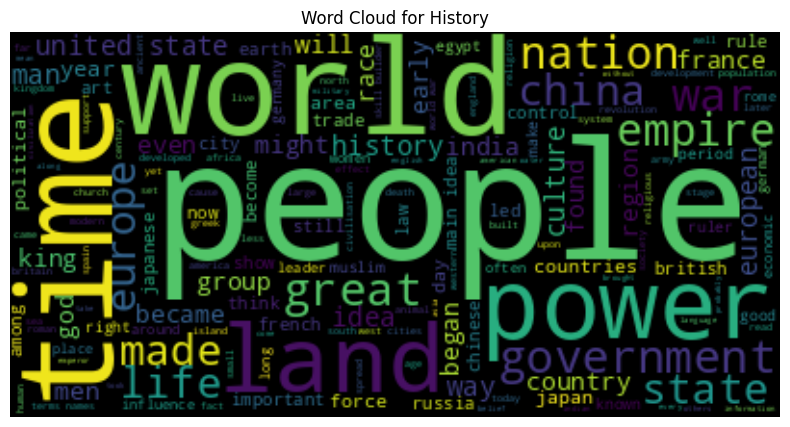

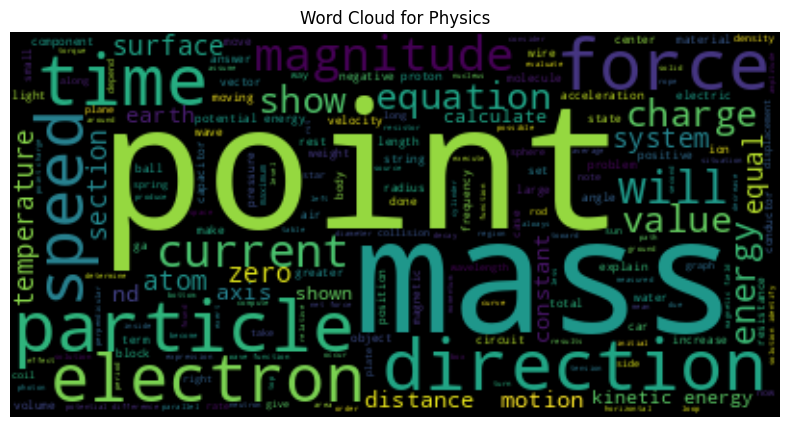

In [19]:
# Create a word cloud for each category
create_word_cloud(data_biology, 'Biology')
create_word_cloud(data_computer_science, 'Computer_Science')
create_word_cloud(data_history, 'History')
create_word_cloud(data_physics, 'Physics')

Text(0.5, 9.444444444444438, 'The number of words')

<Figure size 800x1000 with 0 Axes>

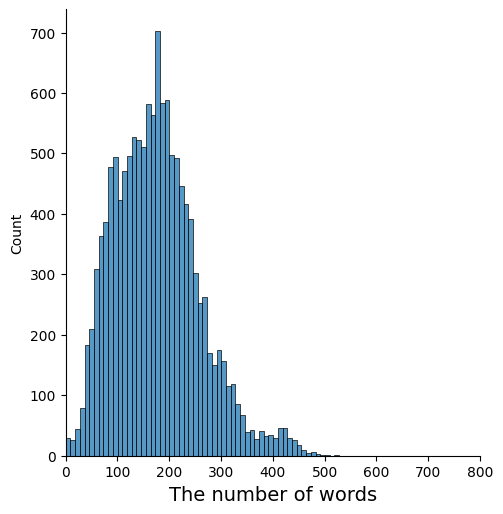

In [20]:
# Counting the number of words in each sentence of the proccessed data
count_sent_word = [len(sentence.split()) for sentence in preprocessed_data]

# Visualize it
plt.figure(figsize=(8, 10))

sns.displot(count_sent_word)

plt.xlim(0, 800)

plt.xlabel("The number of words", fontsize=14)


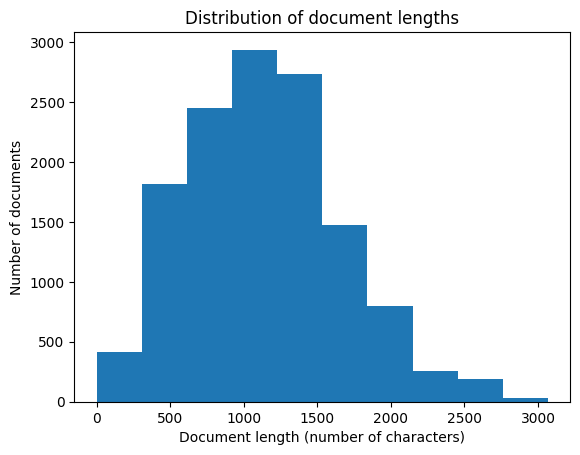

In [21]:
# Compute the length of each text document
document_lengths = [len(doc) for doc in preprocessed_data]

# Plot a histogram of document lengths
plt.hist(document_lengths)
plt.xlabel("Document length (number of characters)")
plt.ylabel("Number of documents")
plt.title("Distribution of document lengths")
plt.show()

In [22]:
# print the unique categories

topic_count = pd.Series(category).value_counts()

topic_categories = topic_count.index.tolist()

print(topic_categories)


['Physics', 'Computer_Science', 'Biology', 'History']


In [23]:
# Number of categories

num_class = len(set(category))

print("Number of Categories:", num_class)

Number of Categories: 4


In [24]:
topic_count = pd.Series(category).value_counts()
topic_count

Physics             3436
Computer_Science    3288
Biology             3234
History             3152
dtype: int64

<Axes: >

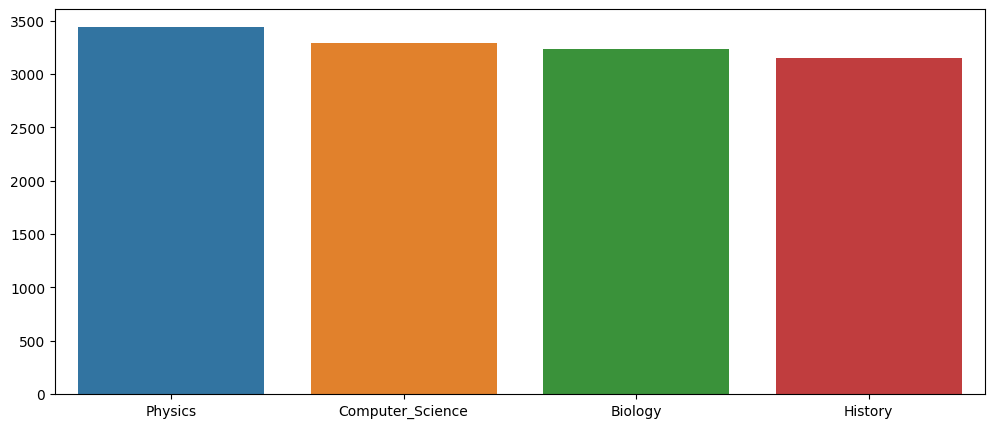

In [25]:
# Visualize the count of each category

fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(111)

sns.barplot(x=topic_categories, y=topic_count)


In [26]:
# Remove stop words from each sentence
filtered_text_data = []
for sentence in preprocessed_data:
    filtered_sentence = " ".join([word for word in sentence.split() if word.lower() not in stop_words])
    filtered_text_data.append(filtered_sentence)

In [27]:
filtered_text_data

['rapidly growing population put stress country economy bangladesh poor est nations world per capita income per year strife grips sri lanka newly freed deeply troubled country indian sub conti nen sri lanka small teardrop shaped island nation southeast coast india formerly known ceylon sri lanka gained depend en britain february main ethnic groups dominate nation quarters population sinhalese buddhists fifth tamils hindu people southern india northern sri lanka sri lanka recent history turmoil militant group tamils long fought armed struggle separate tamil nation since thousands lives lost effort violence rajiv gandhi sri lankan president tried reach accord agreement indian troops enter sri lanka help disarm tamil rebels effort successful indian troops left war tamils sri lankan continues today difficult post independence countries indian subcontinent said former colonies elsewhere read next section formerly held territories southeast asia faced challenges became independent nations',


In [28]:
# Encoding the categories
encoder = LabelEncoder()
category_encode = encoder.fit_transform(category)
num_classes = len(encoder.classes_)



# Print the mapping of categories to their encoded values
print('Category encoding mapping:')
for category, code in zip(encoder.classes_, encoder.transform(encoder.classes_)):
    print(f'{category}: {code}')

Category encoding mapping:
Biology: 0
Computer_Science: 1
History: 2
Physics: 3


In [29]:
# Split the data into 80% train and 20% combined test and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(filtered_text_data, category_encode, test_size=0.3, random_state=42)

# Split the remaining 20% into 10% test and 10% validation sets(X_temp and y_temp are the temporary filtered_text_data and labels shared from the training data)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)


In [30]:
y_val[:3]

array([3, 0, 0])

In [31]:
X_val[:3]

['division point moves constant speed length string motion hence total mass motion proportional time force acting momentum associated entirely increasing amount mass motion increasing velocity individual mass element changes changes time left string moved distance bound ary point advanced distance total force left string components motion direction along length string unbalanced horizontal force therefore magnitude horizontal component string placed displaced position tension greater string stretches somewhat derive expression wave speed apply impulse momentum theorem portion string motion time portion left transverse impulse transverse vy vy fy vy fy equilibrium moving upward velocity still rest disturbance propagates wave speed string equilibrium string motion vy propagation transverse wave string',
 'calvin cycle photosynthesis way making organic molecules carbon dioxide organic molecules contain bonds highly reduced compared build organic molecules cells raw materials provided ligh

In [32]:
print(len(X_train), len(y_train))
print(len(X_val), len(y_val))
print(len(X_test), len(y_test))

9177 9177
1298 1298
2635 2635


In [33]:
# View the first three training categories
y_train[:3]

array([1, 3, 3])

In [34]:
# Coverting the training, testing and validation set to numpy array

X_train_nnlm = np.array(X_train)
X_val_nnlm = np.array(X_val)
X_test_nnlm = np.array(X_test)

In [35]:
# using _1 for model 1 which is nnlm-en-dim128-with-normalization

# Creating the embedding matrix using nnlm-en-dim128-with-normalization

embedding_dim = 128
embedding_layer_1 = hub.KerasLayer(
    "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2",
    input_shape=[],
    dtype=tf.string,
    trainable=True,
)


In [36]:
# Define the model architecture

model_1 = tf.keras.Sequential([
    embedding_layer_1,
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 128)               124642688 
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 124,646,948
Trainable params: 124,646,948
Non-trainable params: 0
_________________________________________________________________


In [37]:
learning_rate = 0.001

# Create the Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model_1.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')])


In [38]:
#define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=2)

# Train the model
history_1 = model_1.fit(
    X_train_nnlm, y_train,
    validation_data=(X_val_nnlm, y_val),
    epochs=10, batch_size=512, verbose=1, callbacks=[early_stop]
)

# converting the X_test_nnlm and y_test(which is still the same) to X_test and y_test to work with the code for evaluation, prediction and performance matrics
X_test = X_test_nnlm
y_test = y_test

Epoch 1/10
18/18 [==============================] - 10s 249ms/step - loss: 1.1888 - accuracy: 0.5295 - val_loss: 0.7847 - val_accuracy: 0.9330
Epoch 2/10
18/18 [==============================] - 5s 277ms/step - loss: 0.6582 - accuracy: 0.8679 - val_loss: 0.3375 - val_accuracy: 0.9800
Epoch 3/10
18/18 [==============================] - 4s 231ms/step - loss: 0.3635 - accuracy: 0.9376 - val_loss: 0.1682 - val_accuracy: 0.9869
Epoch 4/10
18/18 [==============================] - 4s 240ms/step - loss: 0.2324 - accuracy: 0.9636 - val_loss: 0.1194 - val_accuracy: 0.9900
Epoch 5/10
18/18 [==============================] - 5s 267ms/step - loss: 0.1679 - accuracy: 0.9752 - val_loss: 0.0992 - val_accuracy: 0.9946
Epoch 6/10
18/18 [==============================] - 4s 204ms/step - loss: 0.1411 - accuracy: 0.9841 - val_loss: 0.0886 - val_accuracy: 0.9954
Epoch 7/10
18/18 [==============================] - 5s 256ms/step - loss: 0.1187 - accuracy: 0.9889 - val_loss: 0.0825 - val_accuracy: 0.9961
Epoch

In [39]:
# Evaluate the model with the test data

results_1 = model_1.evaluate(X_test, y_test)

print(results_1)

83/83 [==============================] - 1s 8ms/step - loss: 0.0782 - accuracy: 0.9920
[0.0781778022646904, 0.9920303821563721]


In [40]:
#Predicting with the test data

results_pred_1 = model_1.predict(X_test)

83/83 [==============================] - 1s 8ms/step


In [41]:
history_dict_1 = history_1.history
history_dict_1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

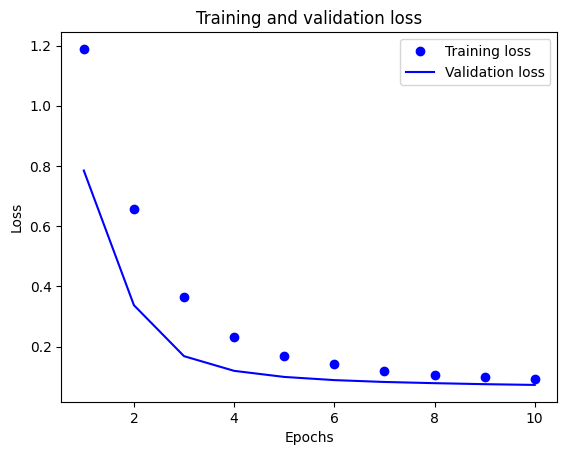

In [42]:
# Assignig values to the history dictionary to the metrics variable
acc_1 = history_dict_1['accuracy']
val_acc_1 = history_dict_1['val_accuracy']
loss_1 = history_dict_1['loss']
val_loss_1 = history_dict_1['val_loss']

epochs_1 = range(1, len(acc_1) + 1)

# Ploting the graph for training and validation loss vs epochs
# "bo" is for "blue dot"
plt.plot(epochs_1, loss_1, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_1, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

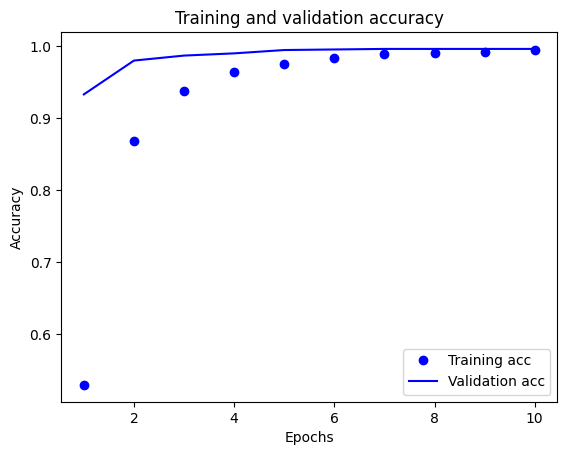

In [43]:
# Ploting the graph for training and validation accuracy vs epochs

plt.clf()

plt.plot(epochs_1, acc_1, 'bo', label='Training acc')
plt.plot(epochs_1, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [44]:
# Convert to 1D numpy array
y_pred_1 = np.argmax(results_pred_1, axis=1)

# Assign y_test value to y_true
y_true_1 = y_test

# Confusion Matrix
cm_1 = confusion_matrix(y_true_1, y_pred_1)
print("Confusion Matrix:\n", cm_1, "\n")

# Accuracy
accuracy_1 = accuracy_score(y_true_1, y_pred_1)
print("Accuracy:", accuracy_1, "\n")

# ROC-AUC Score (One-vs-Rest approach)

y_true_binarized = label_binarize(y_true_1, classes=[0, 1, 2, 3])
y_pred_binarized = label_binarize(y_pred_1, classes=[0, 1, 2, 3])
roc_auc_1 = roc_auc_score(y_true_binarized, y_pred_binarized, multi_class='ovr')
print("ROC-AUC Score:", roc_auc_1, "\n")

# Precision
precision_1 = precision_score(y_true_1, y_pred_1, average='weighted')
print("Precision:", precision_1, "\n")

# Recall
recall_1 = recall_score(y_true_1, y_pred_1, average='weighted')
print("Recall:", recall_1, "\n")

# F1 Score
f1_1 = f1_score(y_true_1, y_pred_1, average='weighted')
print("F1 Score:", f1_1, "\n")

# Cohen's Kappa
kappa_1 = cohen_kappa_score(y_true_1, y_pred_1)
print("Cohen's Kappa:", kappa_1, "\n")

# Matthews Correlation Coefficient (MCC)
mcc_1 = matthews_corrcoef(y_true_1, y_pred_1)
print("Matthews Correlation Coefficient (MCC):", mcc_1, "\n")

# Classification Report
report_1 = classification_report(y_true_1, y_pred_1)
print("Classification Report:\n", report_1)


Confusion Matrix:
 [[645   1   2   7]
 [  1 655   1   2]
 [  4   2 644   1]
 [  0   0   0 670]] 

Accuracy: 0.9920303605313093 

ROC-AUC Score: 0.9946582133846158 

Precision: 0.9920628048857313 

Recall: 0.9920303605313093 

F1 Score: 0.9920266548498333 

Cohen's Kappa: 0.9893730737675953 

Matthews Correlation Coefficient (MCC): 0.9893865653843376 

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       655
           1       1.00      0.99      0.99       659
           2       1.00      0.99      0.99       651
           3       0.99      1.00      0.99       670

    accuracy                           0.99      2635
   macro avg       0.99      0.99      0.99      2635
weighted avg       0.99      0.99      0.99      2635



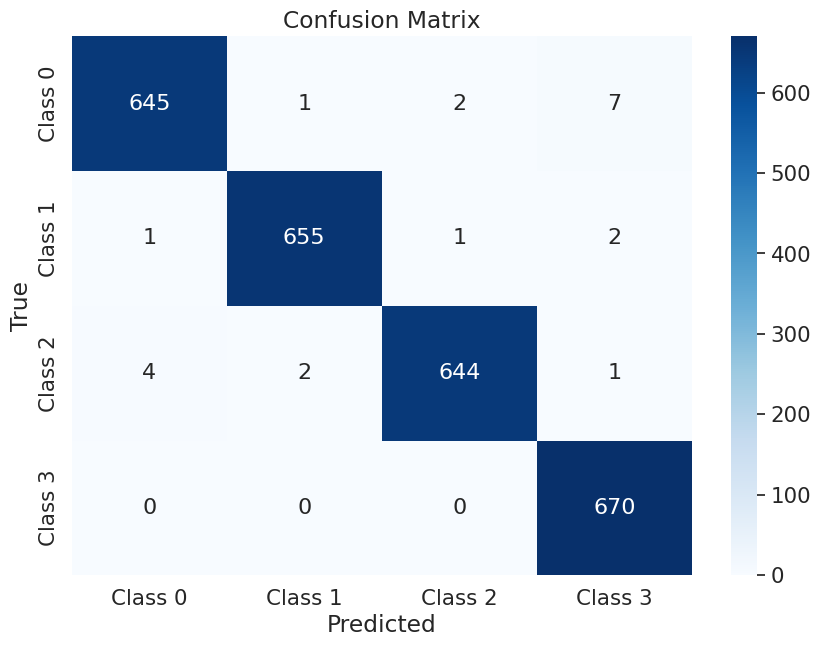

In [45]:
# Calculate the confusion matrix
cm_1 = confusion_matrix(y_true_1, y_pred_1)

# Create a heatmap from the confusion matrix
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(cm_1, annot=True, annot_kws={"size": 16}, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


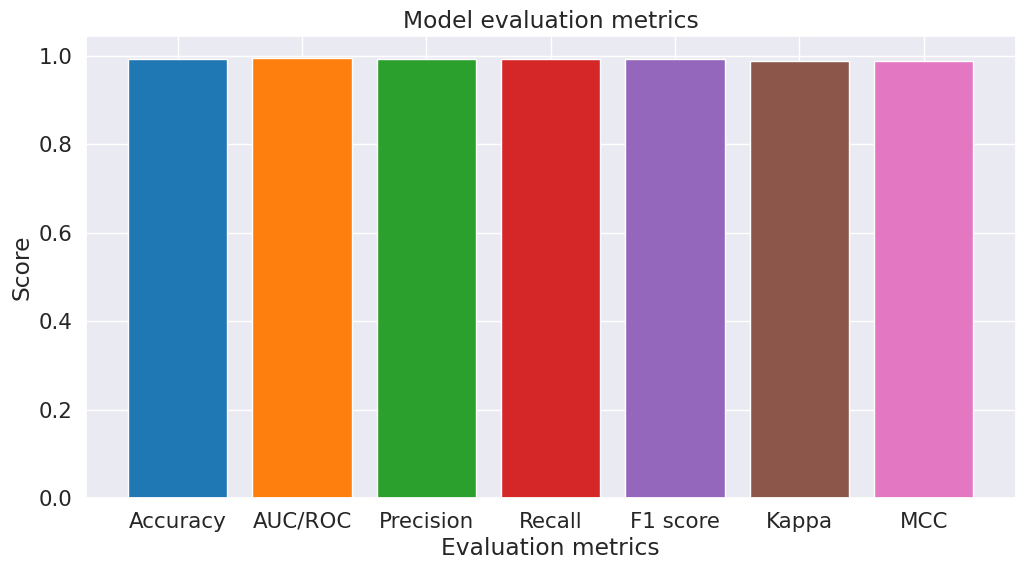

In [46]:
# Evaluation metrics scores
metrics = ['Accuracy', 'AUC/ROC', 'Precision', 'Recall', 'F1 score', 'Kappa', 'MCC']
scores_1 = [accuracy_1, roc_auc_1, precision_1, recall_1, f1_1, kappa_1, mcc_1]

# Set the desired figure size (width, height)
plt.figure(figsize=(12, 6))

# Create a bar plot
plt.bar(metrics, scores_1, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])

# Add labels and title
plt.xlabel('Evaluation metrics')
plt.ylabel('Score')
plt.title('Model evaluation metrics')

# Show plot
plt.show()


In [47]:
# Convert integer-encoded labels to one-hot vectors
y_train_use = to_categorical(y_train)
y_val_use = to_categorical(y_val)
y_test_use = to_categorical(y_test)


# Coverting the training, testing and validation set to numpy array

X_train_use = np.array(X_train)
X_val_use = np.array(X_val)
X_test_use = np.array(X_test)

# Load the Universal Sentence Encoder
use = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", trainable=False)



In [48]:
# Define the model architecture

# Define the model
model_2 = Sequential()
model_2.add(use)
model_2.add(Dense(256, activation='relu'))
model_2.add(Dense(len(encoder.classes_), activation='softmax'))


# Provide an example batch to build the model
example_inputs = tf.constant(["series forms parallel comb tion keep mind total potential difference across resistors connected series sum individual potential differ en ces potential difference across resistors connected parallel every resistor equals potential difference across combination current resistors connected series every resistor equals current combination total current resistors connected parallel sum currents individual resistors evaluate answer check whether results cons tent equivalent resistance resistors connected series greater individual resistor res tors parallel less individual resistor equivalent resistance equivalent resistance network current resistor source emf negligible internal resistance solution identify set network resistors combination series parallel resistances determine steps reducing combination resistors single equivalent resistor ding current resistor continued"], dtype=tf.string)
model_2(example_inputs)

# print the model summary.
model_2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 512)               256797824 
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 256,930,180
Trainable params: 132,356
Non-trainable params: 256,797,824
_________________________________________________________________


In [49]:
learning_rate = 0.001

# Create the Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model_2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [50]:
#define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=2)

# Train the model
history_2 = model_2.fit(
    X_train_use, y_train_use,
    validation_data=(X_val_use, y_val_use),
    epochs=10, batch_size=512, verbose=1, callbacks=[early_stop]
)

Epoch 1/10
18/18 [==============================] - 9s 301ms/step - loss: 1.1112 - accuracy: 0.8553 - val_loss: 0.7491 - val_accuracy: 0.9599
Epoch 2/10
18/18 [==============================] - 4s 216ms/step - loss: 0.5047 - accuracy: 0.9586 - val_loss: 0.2865 - val_accuracy: 0.9684
Epoch 3/10
18/18 [==============================] - 5s 301ms/step - loss: 0.2176 - accuracy: 0.9656 - val_loss: 0.1500 - val_accuracy: 0.9715
Epoch 4/10
18/18 [==============================] - 4s 217ms/step - loss: 0.1352 - accuracy: 0.9710 - val_loss: 0.1082 - val_accuracy: 0.9761
Epoch 5/10
18/18 [==============================] - 4s 218ms/step - loss: 0.1045 - accuracy: 0.9746 - val_loss: 0.0903 - val_accuracy: 0.9777
Epoch 6/10
18/18 [==============================] - 5s 275ms/step - loss: 0.0882 - accuracy: 0.9779 - val_loss: 0.0801 - val_accuracy: 0.9792
Epoch 7/10
18/18 [==============================] - 4s 218ms/step - loss: 0.0779 - accuracy: 0.9789 - val_loss: 0.0731 - val_accuracy: 0.9800
Epoch 

In [51]:
# Evaluate the model with the test data

results_2 = model_2.evaluate(X_test_use, y_test_use)

print(results_2)

83/83 [==============================] - 2s 20ms/step - loss: 0.0718 - accuracy: 0.9753
[0.07182791084051132, 0.9753320813179016]


In [52]:
#Predicting with the test data

results_pred_2 = model_2.predict(X_test_use)

83/83 [==============================] - 3s 29ms/step


In [53]:
history_dict_2 = history_2.history
history_dict_2.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

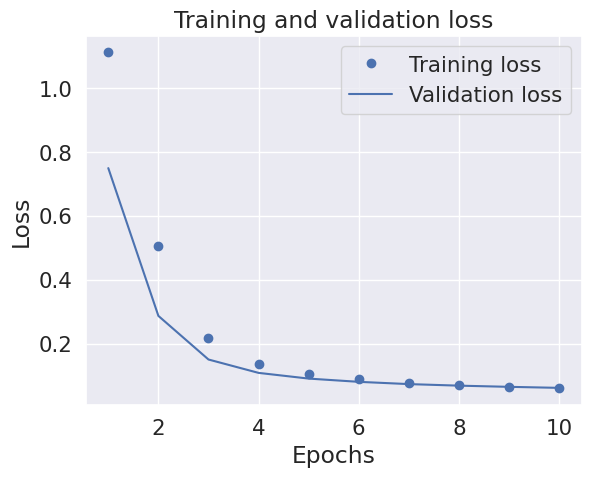

In [54]:
# Assignig values to the history dictionary to the metrics variable
acc_2 = history_dict_2['accuracy']
val_acc_2 = history_dict_2['val_accuracy']
loss_2 = history_dict_2['loss']
val_loss_2 = history_dict_2['val_loss']

epochs_2 = range(1, len(acc_2) + 1)

# Ploting the graph for training and validation loss vs epochs
# "bo" is for "blue dot"
plt.plot(epochs_2, loss_2, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_2, val_loss_2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

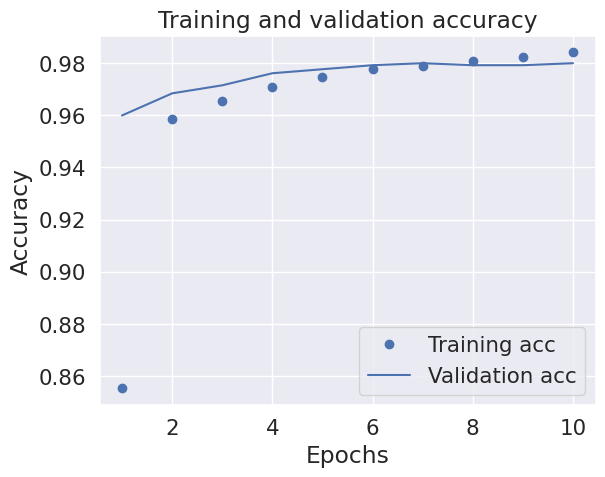

In [55]:
# Ploting the graph for training and validation accuracy vs epochs

plt.clf()

plt.plot(epochs_2, acc_2, 'bo', label='Training acc')
plt.plot(epochs_2, val_acc_2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [56]:
# Convert to 1D numpy array
y_pred_2 = np.argmax(results_pred_2, axis=1)

# Assign y_test value to y_true
y_true_2 = y_test

# Confusion Matrix
cm_2 = confusion_matrix(y_true_2, y_pred_2)
print("Confusion Matrix:\n", cm_2, "\n")

# Accuracy
accuracy_2 = accuracy_score(y_true_2, y_pred_2)
print("Accuracy:", accuracy_2, "\n")

# ROC-AUC Score (One-vs-Rest approach)

y_true_binarized = label_binarize(y_true_2, classes=[0, 1, 2, 3])
y_pred_binarized = label_binarize(y_pred_2, classes=[0, 1, 2, 3])
roc_auc_2 = roc_auc_score(y_true_binarized, y_pred_binarized, multi_class='ovr')
print("ROC-AUC Score:", roc_auc_2, "\n")

# Precision
precision_2 = precision_score(y_true_2, y_pred_2, average='weighted')
print("Precision:", precision_2, "\n")

# Recall
recall_2 = recall_score(y_true_2, y_pred_2, average='weighted')
print("Recall:", recall_2, "\n")

# F1 Score
f1_2 = f1_score(y_true_2, y_pred_2, average='weighted')
print("F1 Score:", f1_2, "\n")

# Cohen's Kappa
kappa_2 = cohen_kappa_score(y_true_2, y_pred_2)
print("Cohen's Kappa:", kappa_2, "\n")

# Matthews Correlation Coefficient (MCC)
mcc_2 = matthews_corrcoef(y_true_2, y_pred_2)
print("Matthews Correlation Coefficient (MCC):", mcc_2, "\n")

# Classification Report
report_2 = classification_report(y_true_2, y_pred_2)
print("Classification Report:\n", report_2)


Confusion Matrix:
 [[629   4   8  14]
 [  0 651   1   7]
 [ 13   3 632   3]
 [  6   3   3 658]] 

Accuracy: 0.9753320683111955 

ROC-AUC Score: 0.9835188258120251 

Precision: 0.9753764185502551 

Recall: 0.9753320683111955 

F1 Score: 0.9753202053090682 

Cohen's Kappa: 0.9671067919697361 

Matthews Correlation Coefficient (MCC): 0.967129639592692 

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       655
           1       0.98      0.99      0.99       659
           2       0.98      0.97      0.98       651
           3       0.96      0.98      0.97       670

    accuracy                           0.98      2635
   macro avg       0.98      0.98      0.98      2635
weighted avg       0.98      0.98      0.98      2635



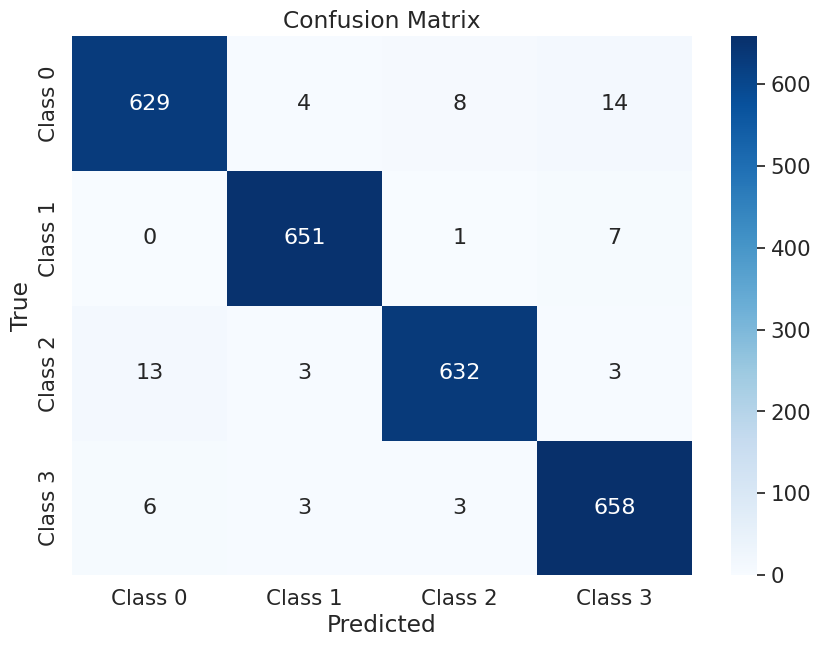

In [57]:
# Calculate the confusion matrix
cm_2 = confusion_matrix(y_true_2, y_pred_2)

# Create a heatmap from the confusion matrix
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(cm_2, annot=True, annot_kws={"size": 16}, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


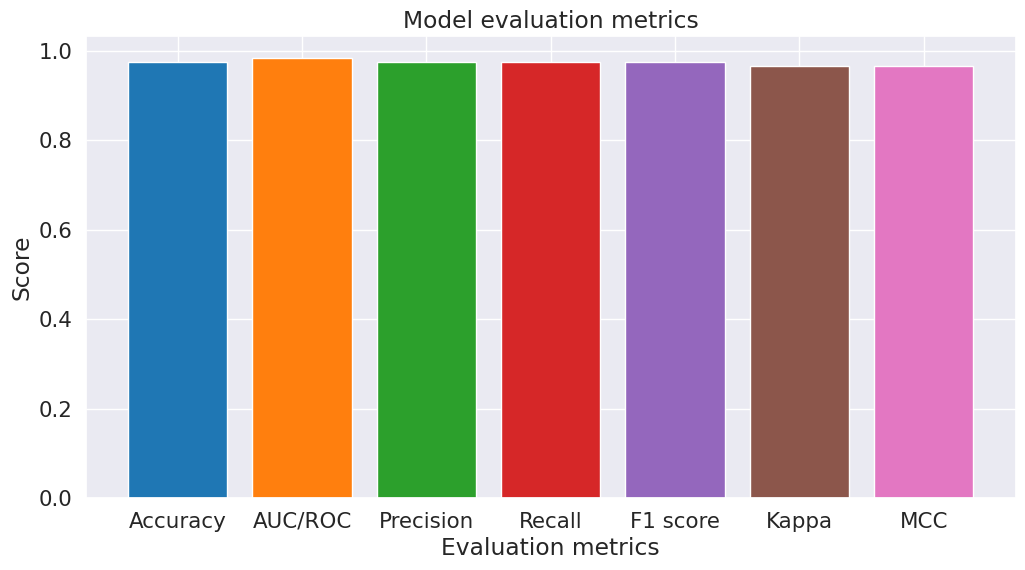

In [58]:
# Evaluation metrics scores
metrics = ['Accuracy', 'AUC/ROC', 'Precision', 'Recall', 'F1 score', 'Kappa', 'MCC']
scores = [accuracy_2, roc_auc_2, precision_2, recall_2, f1_2, kappa_2, mcc_2]

# Set the desired figure size (width, height)
plt.figure(figsize=(12, 6))

# Create a bar plot
plt.bar(metrics, scores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])

# Add labels and title
plt.xlabel('Evaluation metrics')
plt.ylabel('Score')
plt.title('Model evaluation metrics')

# Show plot
plt.show()


In [59]:

# loading the bert model from tensorflow hub

import tensorflow_hub as hub

bert_model_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3"
bert_layer = hub.KerasLayer(bert_model_url, trainable=False)

# tokenize the preprocessed text
import bert
from bert import tokenization
from bert.tokenization import bert_tokenization


vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = bert_tokenization.FullTokenizer(vocab_file, do_lower_case)

def tokenize_and_preprocess(text):
    tokens = tokenizer.tokenize(text)
    tokens = ["[CLS]"] + tokens + ["[SEP]"]
    input_ids = tokenizer.convert_tokens_to_ids(tokens)
    return input_ids

def prepare_bert_input(text, max_seq_length):
    input_ids = tokenize_and_preprocess(text)

    # Truncate the input sequence if it's longer than the max_seq_length
    if len(input_ids) > max_seq_length:
        input_ids = input_ids[:max_seq_length]

    # Pad the input sequence if it's shorter than the max_seq_length
    elif len(input_ids) < max_seq_length:
        pad_length = max_seq_length - len(input_ids)
        input_ids += [0] * pad_length

    # Create input_mask and segment_ids arrays
    input_mask = [1 if token_id != 0 else 0 for token_id in input_ids]
    segment_ids = [0] * max_seq_length

    return input_ids, input_mask, segment_ids

# define a function to get the input_id, input_mask and segment_id

def process_dataset(texts, max_seq_length=128):
    input_ids_list, input_mask_list, segment_ids_list = [], [], []

    for text in texts:
        input_ids, input_mask, segment_ids = prepare_bert_input(text, max_seq_length)
        input_ids_list.append(input_ids)
        input_mask_list.append(input_mask)
        segment_ids_list.append(segment_ids)

    return (
        tf.constant(input_ids_list, dtype=tf.int32),
        tf.constant(input_mask_list, dtype=tf.int32),
        tf.constant(segment_ids_list, dtype=tf.int32),
    )

train_input_ids, train_input_mask, train_segment_ids = process_dataset(X_train)
test_input_ids, test_input_mask, test_segment_ids = process_dataset(X_test)
val_input_ids, val_input_mask, val_segment_ids = process_dataset(X_val)

# There was an OOM error when trying to use the get_bert_embeddings_for_dataset function so processing data in smaller batches

# define a function to extract from the entire dataset

def get_bert_embeddings_for_dataset(input_ids, input_mask, segment_ids, batch_size=32):
    num_examples = input_ids.shape[0]
    embeddings_list = []

    for start_idx in range(0, num_examples, batch_size):
        end_idx = min(start_idx + batch_size, num_examples)
        inputs = {
            'input_word_ids': input_ids[start_idx:end_idx],
            'input_mask': input_mask[start_idx:end_idx],
            'input_type_ids': segment_ids[start_idx:end_idx]
        }
        batch_embeddings = bert_layer(inputs)['pooled_output']
        embeddings_list.append(batch_embeddings)

    embeddings = tf.concat(embeddings_list, axis=0)
    return embeddings

# Extract the embedding from the training, testing and validation set

train_embeddings = get_bert_embeddings_for_dataset(train_input_ids, train_input_mask, train_segment_ids)
test_embeddings = get_bert_embeddings_for_dataset(test_input_ids, test_input_mask, test_segment_ids)
val_embeddings = get_bert_embeddings_for_dataset(val_input_ids, val_input_mask, val_segment_ids)

# convert the encoded category that has been splitted in to training, testing and validation to TensorFlow tensors

train_labels_tensor = tf.convert_to_tensor(y_train, dtype=tf.int32)
test_labels_tensor = tf.convert_to_tensor(y_test, dtype=tf.int32)
val_labels_tensor = tf.convert_to_tensor(y_val, dtype=tf.int32)

# Now we create and train the model based on the bert embedding method

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

input_layer = Input(shape=(train_embeddings.shape[1],))
hidden_layer = Dense(128, activation='relu')(input_layer)
output_layer = Dense(len(encoder.classes_), activation='softmax')(hidden_layer)



In [60]:
model_3 = Model(inputs=input_layer, outputs=output_layer)

learning_rate = 0.001
# Create the Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)

model_3.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer, metrics=['accuracy'])


#define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=2)

# Train the model
history_3 = model_3.fit(train_embeddings, train_labels_tensor,
                    validation_data=(val_embeddings, val_labels_tensor),
                    epochs=10, batch_size=32, verbose=1, callbacks=[early_stop])


# converting the test_embeddings and test_labels_tensor to X_test and y_test to work with the code we use for the three NNLM embedding methods
X_test_bert = test_embeddings
y_test_bert = test_labels_tensor


Epoch 1/10
287/287 [==============================] - 2s 4ms/step - loss: 0.6133 - accuracy: 0.7749 - val_loss: 0.4055 - val_accuracy: 0.8690
Epoch 2/10
287/287 [==============================] - 1s 3ms/step - loss: 0.3066 - accuracy: 0.9026 - val_loss: 0.2284 - val_accuracy: 0.9284
Epoch 3/10
287/287 [==============================] - 1s 3ms/step - loss: 0.2388 - accuracy: 0.9193 - val_loss: 0.2523 - val_accuracy: 0.9114
Epoch 4/10
287/287 [==============================] - 1s 4ms/step - loss: 0.2198 - accuracy: 0.9254 - val_loss: 0.2087 - val_accuracy: 0.9314
Epoch 5/10
287/287 [==============================] - 1s 4ms/step - loss: 0.1925 - accuracy: 0.9354 - val_loss: 0.1883 - val_accuracy: 0.9453
Epoch 6/10
287/287 [==============================] - 1s 3ms/step - loss: 0.1983 - accuracy: 0.9344 - val_loss: 0.2247 - val_accuracy: 0.9322
Epoch 7/10
287/287 [==============================] - 1s 3ms/step - loss: 0.1707 - accuracy: 0.9414 - val_loss: 0.1794 - val_accuracy: 0.9461
Epoch 

In [61]:
# Evaluate the model with the test data

results_3 = model_3.evaluate(X_test_bert, y_test_bert)

print(results_3)

83/83 [==============================] - 0s 2ms/step - loss: 0.1541 - accuracy: 0.9503
[0.15408873558044434, 0.9502846002578735]


In [62]:
#Predicting with the test data

results_pred_3 = model_3.predict(X_test_bert)

83/83 [==============================] - 0s 1ms/step


In [63]:
history_dict_3 = history_3.history
history_dict_3.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

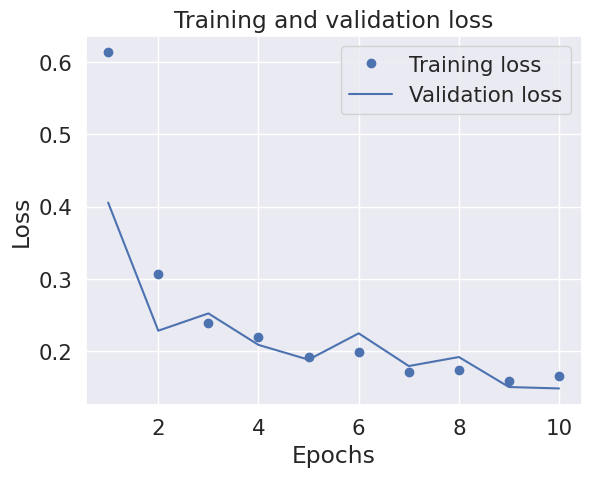

In [64]:
# Assignig values to the history dictionary to the metrics variable
acc_3 = history_dict_3['accuracy']
val_acc_3 = history_dict_3['val_accuracy']
loss_3 = history_dict_3['loss']
val_loss_3 = history_dict_3['val_loss']

epochs_3 = range(1, len(acc_3) + 1)

# Ploting the graph for training and validation loss vs epochs
# "bo" is for "blue dot"
plt.plot(epochs_3, loss_3, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_3, val_loss_3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

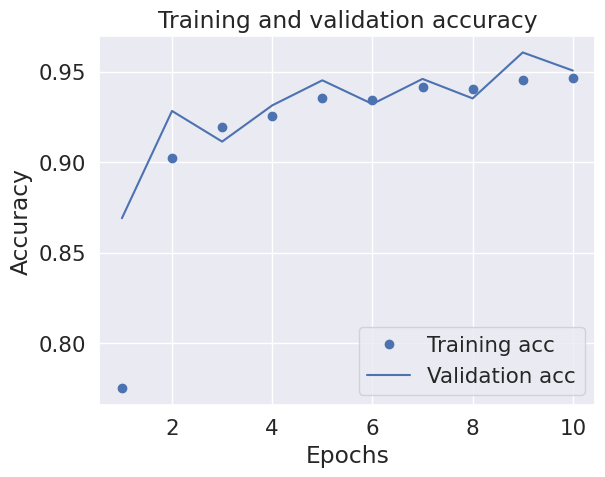

In [65]:
# Ploting the graph for training and validation accuracy vs epochs

plt.clf()

plt.plot(epochs_3, acc_3, 'bo', label='Training acc')
plt.plot(epochs_3, val_acc_3, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [66]:
# Convert to 1D numpy array
y_pred_3 = np.argmax(results_pred_3, axis=1)

# Assign y_test value to y_true
y_true_3 = y_test_bert

# Confusion Matrix
cm_3 = confusion_matrix(y_true_3, y_pred_3)
print("Confusion Matrix:\n", cm_3, "\n")

# Accuracy
accuracy_3 = accuracy_score(y_true_3, y_pred_3)
print("Accuracy:", accuracy_3, "\n")

# ROC-AUC Score (One-vs-Rest approach)

y_true_binarized = label_binarize(y_true_3, classes=[0, 1, 2, 3])
y_pred_binarized = label_binarize(y_pred_3, classes=[0, 1, 2, 3])
roc_auc_3 = roc_auc_score(y_true_binarized, y_pred_binarized, multi_class='ovr')
print("ROC-AUC Score:", roc_auc_3, "\n")

# Precision
precision_3 = precision_score(y_true_3, y_pred_3, average='weighted')
print("Precision:", precision_3, "\n")

# Recall
recall_3 = recall_score(y_true_3, y_pred_3, average='weighted')
print("Recall:", recall_3, "\n")

# F1 Score
f1_3 = f1_score(y_true_3, y_pred_3, average='weighted')
print("F1 Score:", f1_3, "\n")

# Cohen's Kappa
kappa_3 = cohen_kappa_score(y_true_3, y_pred_3)
print("Cohen's Kappa:", kappa_3, "\n")

# Matthews Correlation Coefficient (MCC)
mcc_3 = matthews_corrcoef(y_true_3, y_pred_3)
print("Matthews Correlation Coefficient (MCC):", mcc_3, "\n")

# Classification Report
report_3 = classification_report(y_true_3, y_pred_3)
print("Classification Report:\n", report_3)


Confusion Matrix:
 [[625   0  14  16]
 [  8 616  11  24]
 [ 25   4 613   9]
 [ 14   1   5 650]] 

Accuracy: 0.9502846299810247 

ROC-AUC Score: 0.9668000649049746 

Precision: 0.9512495953408632 

Recall: 0.9502846299810247 

F1 Score: 0.9503989913765215 

Cohen's Kappa: 0.9337062741518327 

Matthews Correlation Coefficient (MCC): 0.9339429042948375 

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       655
           1       0.99      0.93      0.96       659
           2       0.95      0.94      0.95       651
           3       0.93      0.97      0.95       670

    accuracy                           0.95      2635
   macro avg       0.95      0.95      0.95      2635
weighted avg       0.95      0.95      0.95      2635



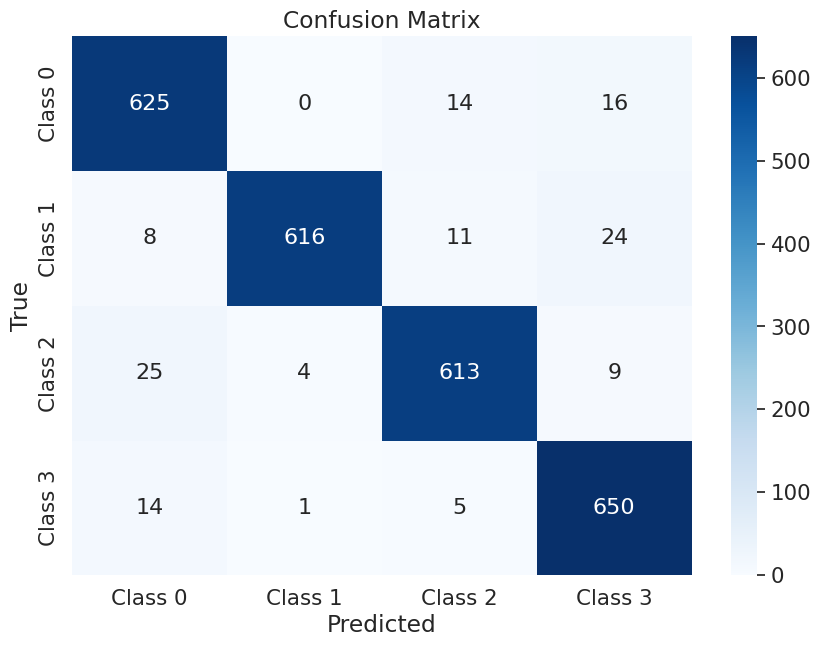

In [67]:
# Calculate the confusion matrix
cm_3= confusion_matrix(y_true_3, y_pred_3)

# Create a heatmap from the confusion matrix
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(cm_3, annot=True, annot_kws={"size": 16}, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


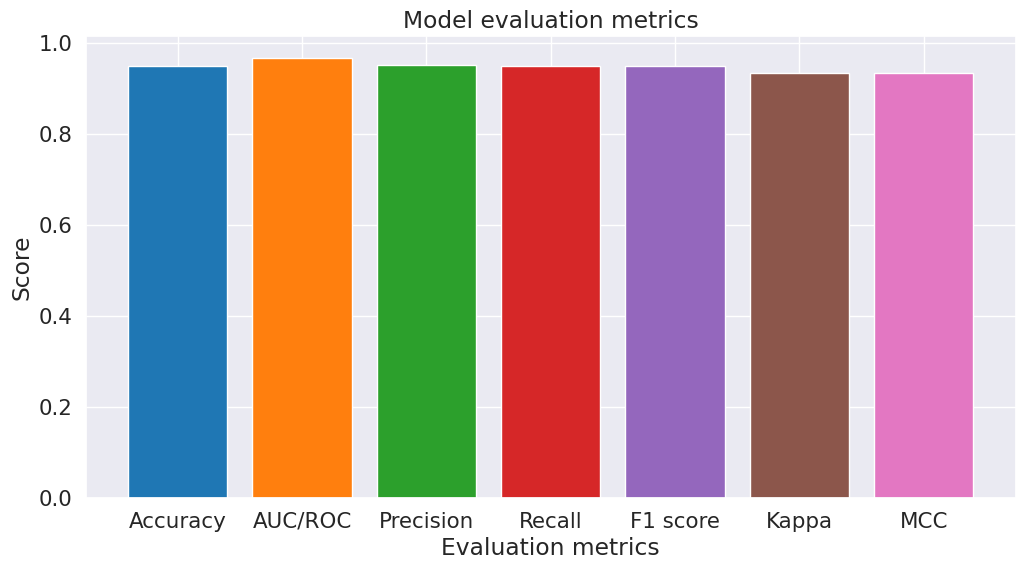

In [68]:
# Evaluation metrics scores
metrics = ['Accuracy', 'AUC/ROC', 'Precision', 'Recall', 'F1 score', 'Kappa', 'MCC']
scores_3 = [accuracy_3, roc_auc_3, precision_3, recall_3, f1_3, kappa_3, mcc_3]

# Set the desired figure size (width, height)
plt.figure(figsize=(12, 6))

# Create a bar plot
plt.bar(metrics, scores_3, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])

# Add labels and title
plt.xlabel('Evaluation metrics')
plt.ylabel('Score')
plt.title('Model evaluation metrics')

# Show plot
plt.show()


In [69]:
# Find the best model based on their accuracy
best_model = ''
if results_1[1] >= results_3[1] and results_1[1] >= results_3[1]:
    best_model = 'NNLM-128'
elif results_2[1] >= results_1[1] and results_2[1] >= results_3[1]:
    best_model = 'USE'
else:
    best_model = 'BERT'

# Print the best model
print(f'{best_model} is the best model.')

NNLM-128 is the best model.


In [70]:
# Determine the best model
if results_1[1] >= results_2[1] and results_1[1] >= results_3[1]:
    best_model = model_1
    best_model_name = 'NNLM-128'
elif results_2[1] >= results_1[1] and results_2[1] >= results_3[1]:
    best_model = model_2
    best_model_name = 'USE'
else:
    best_model = model_3
    best_model_name = 'BERT'

In [75]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [77]:
# saving the encoder
np.save("/content/drive/MyDrive/NLP_task/enncoder_classes.npy", encoder.classes_)

# saving the model
model_1.save("/content/drive/MyDrive/NLP_task/subject_classification_model", save_format="tf")

In [71]:
# import tensorflow as tf

# # Save the best model
# best_model.save('/content/drive/MyDrive/best_model.h5')


In [73]:
# # Testing the Best model on unseen data

# if best_model == 'NNLM-128':
#     user_input = input("Enter your text: ")
#     preprocessed_input = preprocess_text(user_input)
#     input_array = np.array([preprocessed_input])
#     predictions = model_1.predict(input_array)
#     predicted_label = np.argmax(predictions, axis=-1)
#     predicted_class_name = encoder.inverse_transform(predicted_label)[0]
#     print(f"The input text belongs to the category: {predicted_class_name}")
#     print("Predicted with NNLM-128 Model")


# elif best_model == 'USE':
#     user_input_2 = input("Enter your text: ")
#     preprocessed_input_2 = preprocess_text(user_input_2)
#     input_array_2 = np.array([preprocessed_input_2])
#     predictions_2 = model_2.predict(input_array_2)
#     predicted_label_2 = np.argmax(predictions_2, axis=-1)
#     predicted_class_name_2 = encoder.inverse_transform(predicted_label_2)[0]
#     print(f"The input text belongs to the category: {predicted_class_name_2}")
#     print("Predicted with USE Model")

# else:
#     user_input_3 = input("Enter your text: ")
#     user_input_ids, user_input_mask, user_segment_ids = process_dataset(user_input_3)
#     user_input_embeddings = get_bert_embeddings_for_dataset(user_input_ids, user_input_mask, user_segment_ids)
#     predictions_3 = model_3.predict(user_input_embeddings)
#     predicted_label_3 = np.argmax(predictions_3, axis=-1)
#     predicted_label_3 = predicted_label_3.reshape((1, len(predicted_label_3)))
#     predicted_class_name_3 = encoder.inverse_transform(predicted_label_3)[0]
#     print(f"The input text belongs to the category: {predicted_class_name_3}")
#     print("Predicted with BERT Model")